Shape of the dataframe:  (18000, 2)


C:\Users\LUCIFER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LUCIFER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

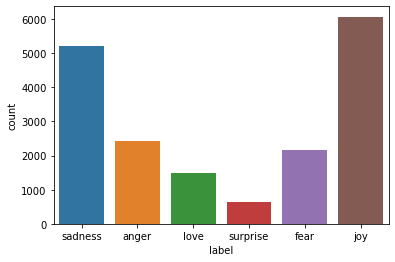

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve
from sklearn.metrics import classification_report, plot_confusion_matrix

df_train= pd.read_csv("train.txt",delimiter=";",names=['text','label'])
df_val=pd.read_csv("val.txt",delimiter=';',names=['text','label'])
df=pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop=True)
print("Shape of the dataframe: ",df.shape)

df.sample(5)
sns.countplot(df.label)


C:\Users\LUCIFER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

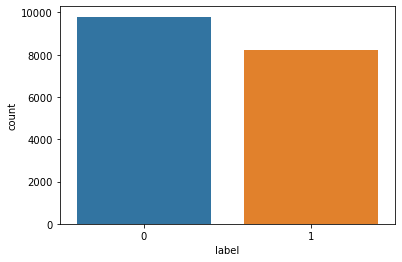

In [7]:
def custom_encoder(df):
    df.replace(to_replace="surprise", value=1, inplace=True)
    df.replace(to_replace="love",value=1,inplace=True)
    df.replace(to_replace="joy",value=1,inplace=True)
    df.replace(to_replace="fear",value=0,inplace=True)
    df.replace(to_replace="anger",value=0,inplace=True)
    df.replace(to_replace="sadness",value=0,inplace=True)
    
    
custom_encoder(df['label'])
sns.countplot(df.label)

In [ ]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lm=WordNetLemmatizer()

def text_transformation(df_col):
    corpus=[]
    for item in df_col:
        new_item=re.sub('[^a-zA-Z]',' ',str(item))
        new_item= new_item.lower()
        new_item=new_item.split()
        new_item=[lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus


corpus= text_transformation(df['text'])
cv=CountVectorizer(ngram_range=(1,2))
traindata=cv.fit_transform(corpus)
X=traindata
y=df.label

parameters={'max_features':('auto','sqrt'),
            'n_estimators':[5,10],
            'max_depth':[10,None],
            'min_samples_split':[5],
            'min_samples_leaf':[1],
            'bootstrap':[True]
    
}


grid_search= GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_


for i in range(8):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean test score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'])
    
    
rfc= RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                            max_depth=grid_search.best_params_['max_depth'],
                            n_estimators=grid_search.best_params_['n_estimators'],
                            min_samples_split=grid_search.best_params_['min_samples_split'],
                            min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                            bootstrap=grid_search.best_params_['bootstrap']
                           )
rfc.fit(X,y)
test_df= pd.read_csv('test.txt', delimiter=';', names=['text','label'])
X_test, y_test=test_df.text, test_df.label


test_df= custom_encoder(y_test)
test_corpus= text_transformation(X_test)
testdata=cv.transform(test_corpus)
predictions=rfc.predict(testdata)
acc_score= accuracy_score(y_test, predictions)
pre_score=precision_score(y_test, predictions)
rec_score=recall_score(y_test, predictions)

print('Acuracy Score:',acc_score)
print('Precision Score:',pre_score)
print('Recall Score:',rec_score)
print("-"*50)
cr= classification_report(y_test, predictions)
print(cr)
predictions_probability= rfc.predict_proba(testdata)
fpr,tpr,thresholds=roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

def expression_check(prediction_input):
    if prediction_input==0:
        print("Input statement has negative sentiment")
    elif prediction_input==1:
        print("Input statement has positive sentiment")
    else:
        print("Invalid Statement")
        
def sentiment_predictor(input):
    input= text_transformation(input)
    transformed_input=cv.transform(input)
    prediction=rfc.predict(transformed_input)
    expression_check(prediction)
    
input1=["Sometimes I just don't want to go out"]
input2=["I bought a new phone and it's so good"]

sentiment_predictor(input1)
sentiment_predictor(input2)

In [ ]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

def text_transformation(df_col):
    corpus=[]
    for item in df_col:
        new_item=re.sub('[^a-zA-Z]',' ',str(item))
        new_item= new_item.lower()
        new_item=new_item.split()
        new_item=[lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus
corpus= text_transformation(df['text'])
cv=CountVectorizer(ngram_range=(1,2))
traindata=cv.fit_transform(corpus)
X=traindata
y=df.label

parameters={'max_features':('auto','sqrt'),
            'n_estimators':[5,10],
            'max_depth':[10,None],
            'min_samples_split':[5],
            'min_samples_leaf':[1],
            'bootstrap':[True]
    
}

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\LUCIFER/nltk_data'
    - 'C:\\Users\\LUCIFER\\anaconda3\\nltk_data'
    - 'C:\\Users\\LUCIFER\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\LUCIFER\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\LUCIFER\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
